In [20]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage(df, x, y):   
    counts = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    print(counts)
    sns.catplot(x=x, y='percent', hue=y, data=counts, kind='bar')
    plt.show()

df = pd.read_csv('ze_final.csv')

In [2]:
df = df[df['centro'] == 'CECULT']


**Perfil dos Estudantes na Amostra**

- 77% evadiram
- 76% possuem cidade de origem diferente da cidade do campus
- 56% são do sexo feminino
- Idade média dos estudantes é 27

In [3]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['event'].value_counts(normalize=True))

1    0.776675
0    0.223325
Name: event, dtype: float64


In [4]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

print(df[idx]['sexo'].value_counts(normalize=True))

print(df[idx]['idade'].mean())


1    0.764268
0    0.235732
Name: is_outra_cidade, dtype: float64
0    0.560794
1    0.439206
Name: sexo, dtype: float64
27.22828784119107


**Taxa de evasão é maior para estudantes cuja origem difere da cidade do campus?**

- Taxa de evasão é maior para estudantes cuja cidade de origem difere daquela do campus (83% vs 60%)

   is_outra_cidade  event    percent
0                0      1  60.000000
1                0      0  40.000000
2                1      1  83.116883
3                1      0  16.883117


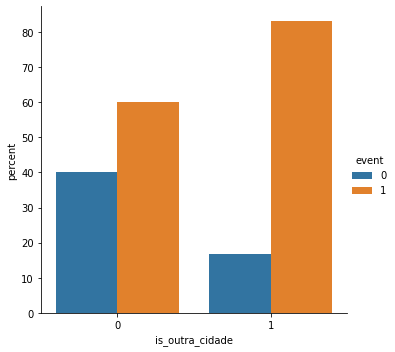

In [5]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

#print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_outra_cidade', 'event')

**Taxa de evasão é maior para ingressantes no 1o semestre?**

- Evasão é maior entre ingressantes no 2o semestre (97% vs 67%)

1    0.667494
2    0.332506
Name: semestreIngresso, dtype: float64


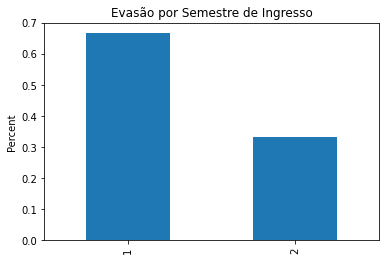

In [6]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')
counts = df.loc[idx, 'semestreIngresso'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Semestre de Ingresso')
plt.show()


1    0.667494
2    0.332506
Name: semestreIngresso, dtype: float64
   semestreIngresso  event    percent
0                 1      1  67.657993
1                 1      0  32.342007
2                 2      1  97.761194
3                 2      0   2.238806


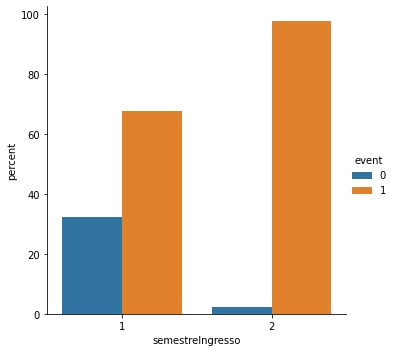

In [7]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreIngresso'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreIngresso', 'event')

**Taxa de evasão no 2o semestre letivo é maior?**

- Evasão é maior no 2o semestre letivo (80% vs 71%). Por quê? O SISU pode ser uma linha de investigação.

2    0.674121
1    0.325879
Name: semestreLetivo, dtype: float64


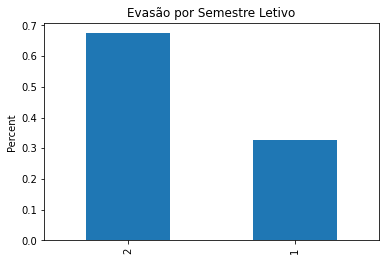

In [8]:
idx = df['event'] == 1

counts = df.loc[idx, 'semestreLetivo'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Semestre Letivo')
plt.show()


2    0.647643
1    0.352357
Name: semestreLetivo, dtype: float64
   semestreLetivo  event    percent
0               1      1  71.830986
1               1      0  28.169014
2               2      1  80.842912
3               2      0  19.157088


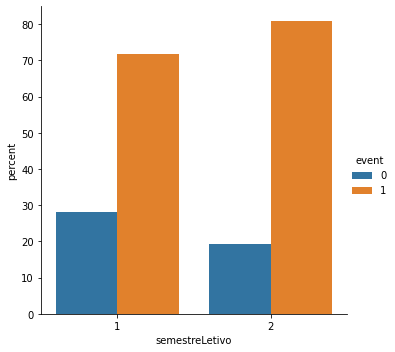

In [9]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreLetivo'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreLetivo', 'event')

**Há interação entre evasão e o sexo do estudante?**

- Taxa de evasão é maior entre homens (80% vs 75%).
- Taxa de evasão tende a crescer entre homens nos três primeiros semestres.

0    0.543131
1    0.456869
Name: sexo, dtype: float64


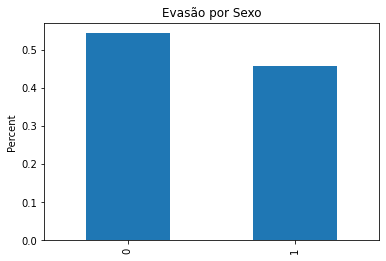

In [10]:
idx = df['event'] == 1

counts = df.loc[idx, 'sexo'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Sexo')
plt.show()

0    0.560794
1    0.439206
Name: sexo, dtype: float64
   sexo  event    percent
0     0      1  75.221239
1     0      0  24.778761
2     1      1  80.790960
3     1      0  19.209040


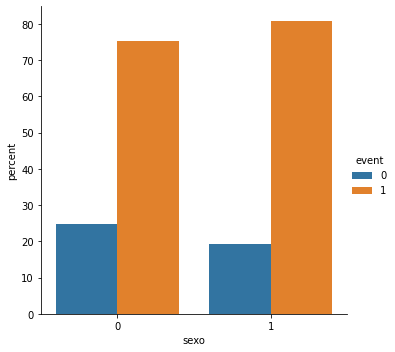

In [11]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['sexo'].value_counts(normalize=True))

plot_percentage(df[idx], 'sexo', 'event')

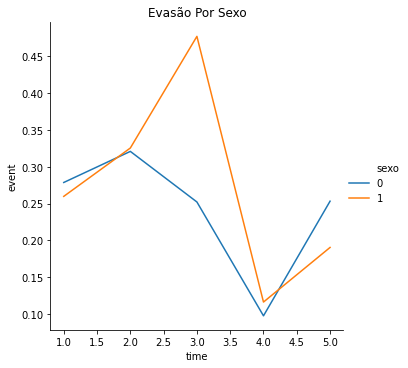

In [12]:
data = df.groupby(['time','sexo']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='sexo',  kind="line")    
ax.set(title='Evasão Por Sexo')    

**Como se comporta a taxa de evasão com o tempo?**

- A taxa de evasão tende a crescer nos três primeiros semestres

[Text(0.5, 1.0, 'Evasão Geral')]

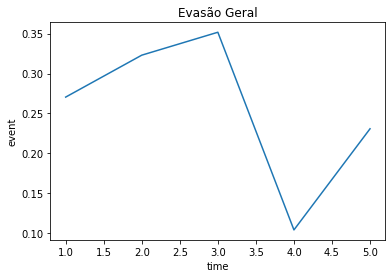

In [13]:
data = df.groupby('time').agg({'event':'mean'}).reset_index()

ax = sns.lineplot(x='time', y='event', data=data)    
ax.set(title='Evasão Geral')

**Há diferenças entre cota e ampla concorrência?**

- Taxa de evasão é maior em estudantes de ampla concorẽncia (84% vs 69%)
- Taxa de evasão apresenta crescimento maior para ampla concorrência nos três primeiros semestres.

0    0.521092
1    0.478908
Name: is_cotista, dtype: float64
   is_cotista  event    percent
0           0      1  84.761905
1           0      0  15.238095
2           1      1  69.948187
3           1      0  30.051813


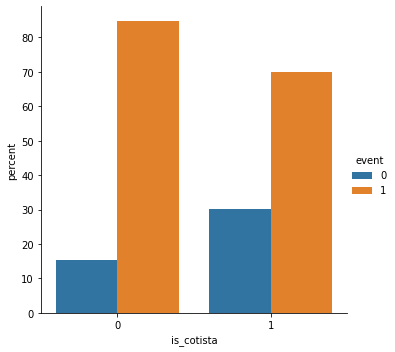

In [14]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['is_cotista'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_cotista', 'event')

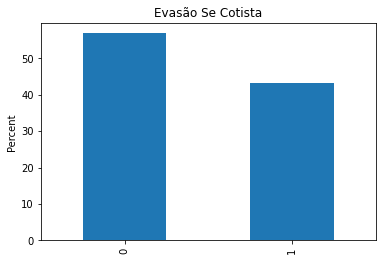

In [15]:
idx = df['event'] == 1

ax = df.loc[idx, 'is_cotista'].value_counts(normalize=True).mul(100).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Se Cotista')
plt.show()

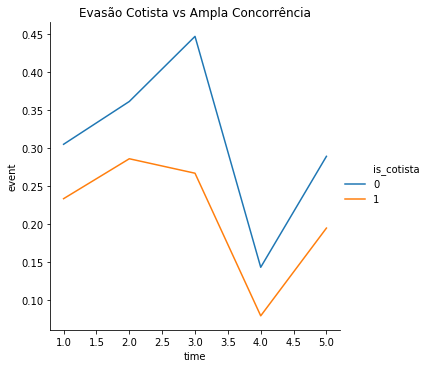

In [16]:
data = df.groupby(['time','is_cotista']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='is_cotista',  kind="line")    
ax.set(title='Evasão Cotista vs Ampla Concorrência')    

**A idade de ingresso afeta a taxa de evasão?**

- Taxa de evasão tende a decrescer quanto maior a idade de ingresso

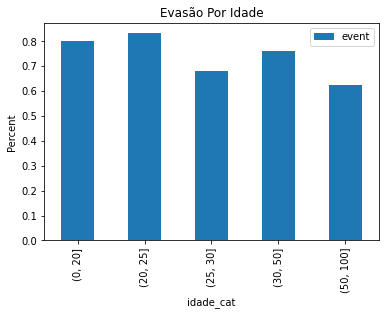

In [18]:
col = 'idade_cat'
df[col] = pd.cut(df.idade, bins=[0,20,25,30,50,100])

idx = df['time'] == df.groupby('matricula')['time'].transform('max')


ax = df[idx].groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Idade')
plt.show()

**Gap (tempo entre o término do ensino médio e o ingresso no curso) afeta a evasão?**

- Gap parece não afetar a taxa de evasão

(10.0, 42.0]    0.280612
(0.0, 1.0]      0.198980
(1.0, 2.0]      0.135204
(3.0, 4.0]      0.091837
(2.0, 3.0]      0.086735
(5.0, 6.0]      0.043367
(9.0, 10.0]     0.038265
(7.0, 8.0]      0.035714
(4.0, 5.0]      0.033163
(8.0, 9.0]      0.028061
(6.0, 7.0]      0.028061
Name: gap_cat, dtype: float64


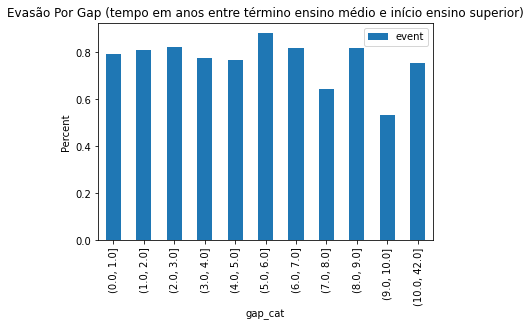

In [19]:
col = 'gap_cat'
df[col] = pd.cut(df.gap, bins=[0,1,2,3,4,5,6,7,8,9,10, df.gap.max()])

idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx][col].value_counts(normalize=True))

ax = df[idx].groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Gap (tempo em anos entre término ensino médio e início ensino superior)')
plt.show()